<a href="https://colab.research.google.com/github/Batman511/ML_tasks/blob/main/%D0%9B%D0%B0%D0%B1%D1%8B_%D0%BF%D0%BE_%D0%98%D0%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt

import seaborn as sns;
sns.set(style='white')
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
from google.colab import files
uploaded = files.upload()

# Лаб. работа № 1

**Программные инструменты, необходимые для выполнения лабораторных работ по машинному обучению на языке Python**

## Базовые функции

Создание матрицы

In [ ]:
X = np.random.normal(10, 10, size=(4, 5))
X

array([[17.87714212,  8.84279131,  9.40610345,  6.31133325, 26.55819204],
       [20.94273644, -4.27589299, -7.74026526,  7.57141571, 13.17484157],
       [19.15432183, 24.84133141, 16.70762771, 14.24133166, 21.26826055],
       [ 3.58148512, -4.78215054,  3.91316357, 13.75187111, 12.87744164]])

Нормировка

In [ ]:
norm_X = ((X - np.mean(X, axis = 0))/np.std(X, axis = 0))
print(norm_X)

[[ 0.36043205  0.22215998  0.42959732 -1.16793218  1.4050273 ]
 [ 0.80449973 -0.86278122 -1.49141915 -0.81396078 -0.9197491 ]
 [ 0.54543834  1.54527097  1.24763341  1.05969398  0.48613125]
 [-1.71037012 -0.90464973 -0.18581158  0.92219898 -0.97140944]]


Единичная матрица

In [ ]:
A = np.eye(3)
B = np.eye(3)
AB = np.vstack((A, B))   # вертикальная стыковка матриц
AB

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

## Титаник

In [ ]:
!ls

sample_data  Титаник.csv


In [ ]:
df = pd.read_csv('Титаник.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df['Age'].value_counts().index[0]   # мода

24.0

In [ ]:
(df['Age'].sort_values().dropna()[10:-10]).mean()

29.530979827089336

In [ ]:
df['Age_NaN'] = np.where(df['Age'].isnull(), df['Age'].mean(), df['Age'])

In [ ]:
df['Age'].iloc[3]

35.0

In [ ]:
pd.isnull(df['Age'].iloc[3])

False

In [ ]:
for i in range(5,df.shape[0]):
    if pd.isnull(df['Age'].iloc[i]):
        df['Age'].iloc[i] = df['Age'].iloc[i-5:i].mean()
df['Age'].isna().sum()

0

In [ ]:
len_man = df[(df['Sex'] == 'male')].shape[0]
print("1. Сколько мужчин было на корабле?  - {}".format(len_man))

1. Сколько мужчин было на корабле?  - 577


In [ ]:
len_survived = df[(df['Survived'] == 1)].shape[0]
print("2. Какая доля пассажиров (в %) выжила?  - {}%".format( round(len_survived/df.shape[0],2) ))

2. Какая доля пассажиров (в %) выжила?  - 0.38%


In [ ]:
len_2_class = df[(df['Pclass'] == 2)].shape[0]
print("3. Какая доля пассажиров (в %) от общего количества путешествовала во 2-ом классе?   - {}%".format( round(len_2_class/df.shape[0],2) ))

3. Какая доля пассажиров (в %) от общего количества путешествовала во 2-ом классе?   - 0.21%


In [ ]:
print("4. Cреднее и медиана возраста всех людей на корабле:   среднее - {}, медиана - {}".format( round(df['Age'].mean(),2), round(df['Age'].median(),2) ))

4. Cреднее и медиана возраста всех людей на корабле:   среднее - 29.7, медиана - 28.0


In [ ]:
print("5. Коррелируют ли число братьев/сестер с числом родителей/детей?   коэфф. корреляции - {}   p-value = {}".format( round(scipy.stats.pearsonr(df['SibSp'], df['Parch'])[0],4), round(scipy.stats.pearsonr(df['SibSp'], df['Parch'])[1],4 )))  #.format( round(np.corrcoef(df['SibSp'], df['Parch'])[0][1],4) ))

5. Коррелируют ли число братьев/сестер с числом родителей/детей?   коэфф. корреляции - 0.4148   p-value = 0.0


In [ ]:
list_names = []
for name in df['Name']:
    if '(' in name:
        list_names.append(name.split('(')[1].split(' ')[0].strip(' ;.,\"()'))
    else:
        list_names.append(name.split(' ')[2])
df['First_name'] = list_names
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,First_name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Owen
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Florence
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Lily
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,William
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Juozas
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Margaret
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Catherine
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Karl


In [ ]:
df['First_name'].isna().sum()

0

In [ ]:
popular_female = df['First_name'][(df['Sex'] == 'female')].value_counts().index[0]
print("6. Какое самое популярное женское имя было на корабле?  - {}".format(popular_female))

6. Какое самое популярное женское имя было на корабле?  - Mary


In [ ]:
# df['First_name'][(df['Sex'] == 'female')].value_counts()

# Лаб. работа № 2

## Примеры

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [ ]:
X.shape

(150, 4)

In [ ]:
y.shape

(150,)

Визуализация

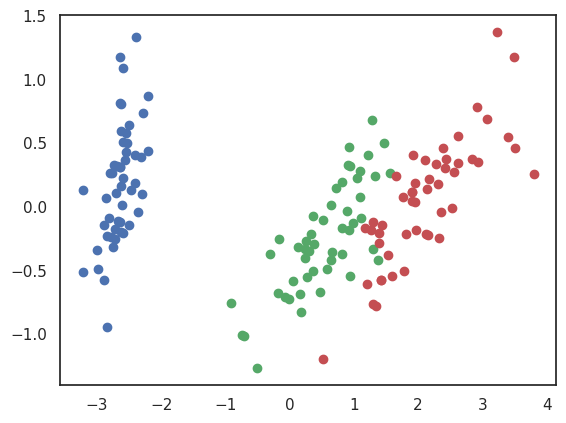

In [ ]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
X_centered = X - X.mean(axis=0)
X_pca = pca.fit_transform(X_centered)

plt.plot(X_pca[y == 0, 0], X_pca[y == 0, 1], 'bo', label='Setosa')
plt.plot(X_pca[y == 1, 0], X_pca[y == 1, 1], 'go', label='Versicolour')
plt.plot(X_pca[y == 2, 0], X_pca[y == 2, 1], 'ro', label='Virginica')
plt.show()

Иерархический (агломеративный) алгоритм

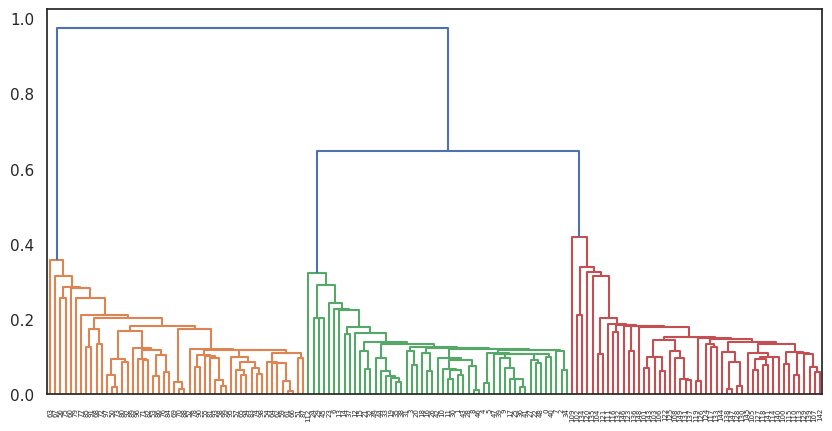

In [ ]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

X = np.zeros((150, 2))
np.random.seed(seed=42)
X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)
X[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)
X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2,
size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)
distance_mat = pdist(X)

Z = hierarchy.linkage(distance_mat, 'single')
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

### K-Means

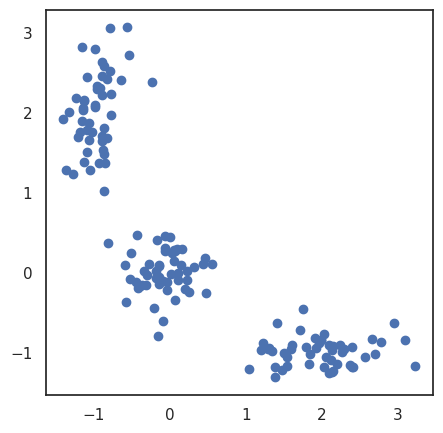

In [ ]:
Z = np.zeros((150, 2))
np.random.seed(seed=42)
Z[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
Z[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)
Z[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
Z[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)
Z[100:150, 0] = np.random.normal(loc=-1.0, scale=.2,size=50)
Z[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)
plt.figure(figsize=(5, 5))
plt.plot(Z[:, 0], Z[:, 1], 'bo');
plt.show()

Метрикой для нахождения числа кластеров является сумма всех расстояний (J) в
кластерах (Ck). С увеличением числа кластеров J(Ck) начнет уменьшаться, пока на очередном шаге не будет меняться значительно слабее, чем на предыдущем. Тогда Si и является показателем эффективного числа кластеров.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

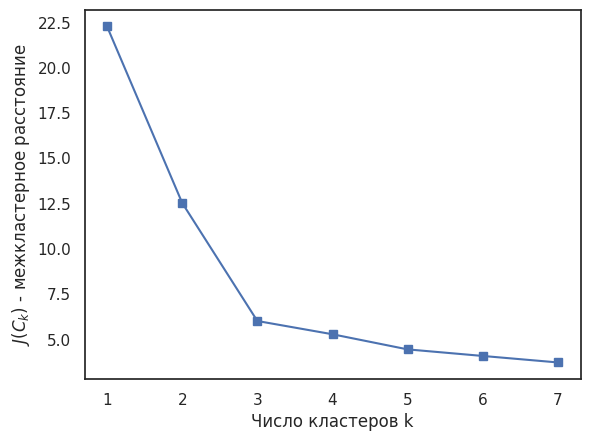

In [ ]:
from sklearn.cluster import KMeans
inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(Z)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('Число кластеров k')
plt.ylabel('$J(C_k)$ - межкластерное расстояние');
plt.show()

Наиболее предпочтительное количество кластеров = 3

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


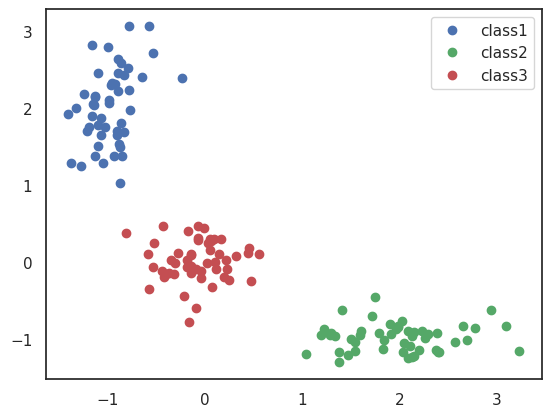

In [ ]:
#строим модель с 3-мя кластерами
kmeans = KMeans(n_clusters=3)
kmeans.fit(Z)

#проставленные метки алгоритмом
dataTrainY=kmeans.labels_

#отображаем полученные кластеры на плоскости
plt.plot(Z[dataTrainY==0,0],Z[dataTrainY==0,1], 'bo', label='class1')
plt.plot(Z[dataTrainY==1,0],Z[dataTrainY==1,1], 'go', label='class2')
plt.plot(Z[dataTrainY==2,0],Z[dataTrainY==2,1], 'ro', label='class3')
plt.legend(loc=0)
plt.show()

## Кластеризация цифр

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
Y = digits.target

# нормализация
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

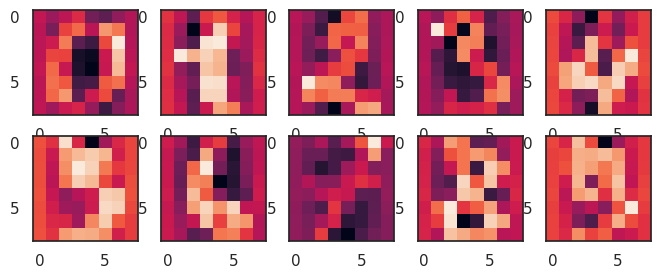

In [ ]:
plt.figure(figsize=(8, 3))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_std[i,:].reshape([8,8]));

2. Размерность

In [ ]:
print(X.shape)   # 1797 цифр с размером картинки 64 признака (изображение 8 на 8)


(1797, 64)


In [ ]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
Y[0]

0

   3-5, 7. KMeans

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
import time

init_ = ['k-means++','random']
time_ = []
AMI = []
ARI = []
n_init_ = [64, 64, 10]
init__ = ['k-means++', 'random', 'k-means++']

for init in init_:
    start = time.time()
    kmeans = KMeans(n_clusters=10, random_state=1, init=init, n_init=64).fit(X_std)
    end = time.time()

    AMI.append(metrics.adjusted_mutual_info_score(Y, kmeans.labels_))
    ARI.append(metrics.adjusted_rand_score(Y, kmeans.labels_))
    time_.append((end-start)* 10**3)


start = time.time()
kmeans = KMeans(n_clusters=10, random_state=1, init='k-means++', n_init=10).fit(X_std)
end = time.time()

AMI.append(metrics.adjusted_mutual_info_score(Y, kmeans.labels_))
ARI.append(metrics.adjusted_rand_score(Y, kmeans.labels_))
time_.append((end-start)* 10**3)

In [ ]:
df_score = pd.DataFrame({'init': init__, 'n_init': n_init_, 'AMI': AMI, 'ARI': ARI, 'time, ms': time_})
df_score

,init,n_init,AMI,ARI,"time, ms"
0,k-means++,64,0.624157,0.467562,8162.201166
1,random,64,0.623044,0.466932,760.687113
2,k-means++,10,0.640634,0.484149,810.092449


Уменьшение размерно в 6 раз сократило время работы алгоритма в 10 раз, качество повышается => PCA - круто

   5-6. PCa

10


<ipython-input-180-8bf2123f4132>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('nipy_spectral', 10))


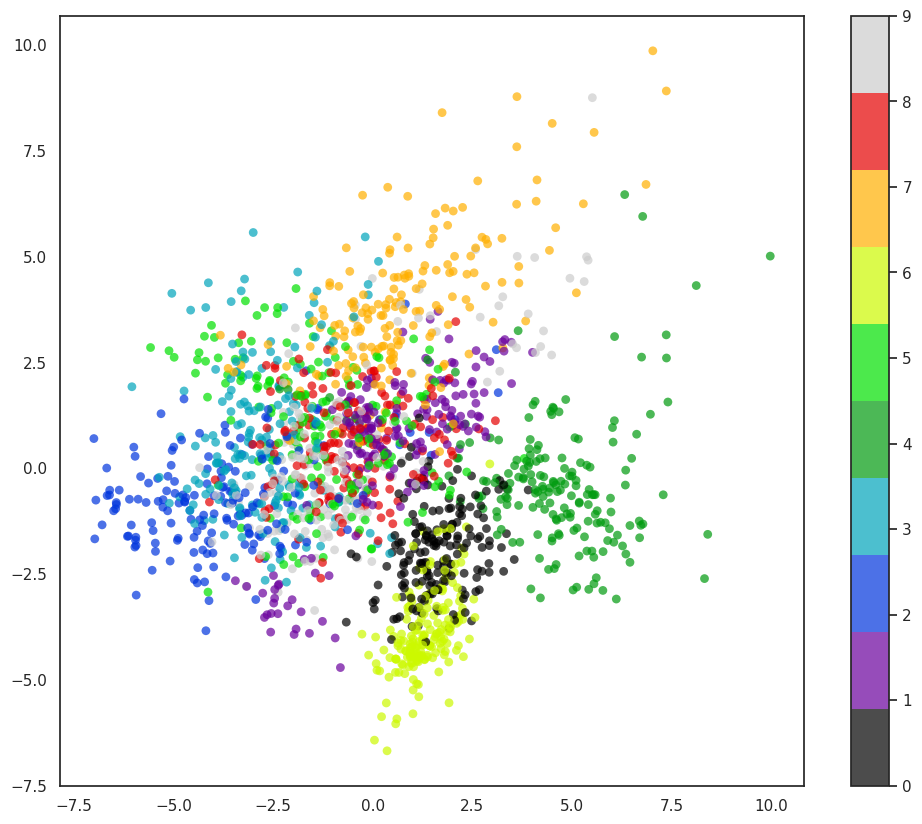

In [ ]:
pca = decomposition.PCA(n_components=10)
X_reduced = pca.fit_transform(X_std)
print(len(pca.components_))

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=Y,
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()

# Лаб. работа №3

## Пример классификации

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# загрузим датасет ирисов
iris = load_iris()
X = iris.data
y = iris.target

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state = 241)

# модель- дерево принятий решений.
clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)

# предсказание
y_new = clf.predict(X_test)


print("Точность (правильность):",accuracy_score(y_test,y_new))
tree.export_graphviz(clf,out_file="treeClassification")
importances = clf.feature_importances_

# нормированные значения важности всех признаков
print(importances)
# Чем выше вес - тем больший вклад в модель дает признак. Самый ценный - признак №3

Точность (правильность): 0.8947368421052632
[0.03362152 0.02017291 0.91454287 0.0316627 ]


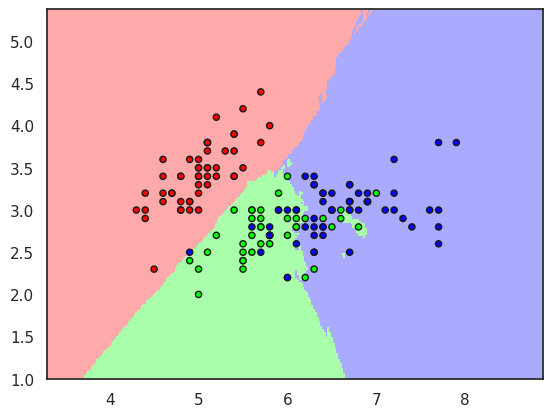

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15  # гиперпараметр для метода ближайших соседей
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target
h = 0.02 # шаг

# Список цветов
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Модель
clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(X, y)

# изобразим границы классов и реальные их элементы
x_min, x_max = X[:, 0].min() - 1,  X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1,  X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

## Пример регрессии

Coefficients: 
 [938.23786125]
MAE: 41.23
MSE: 2548.07
R2: 0.47


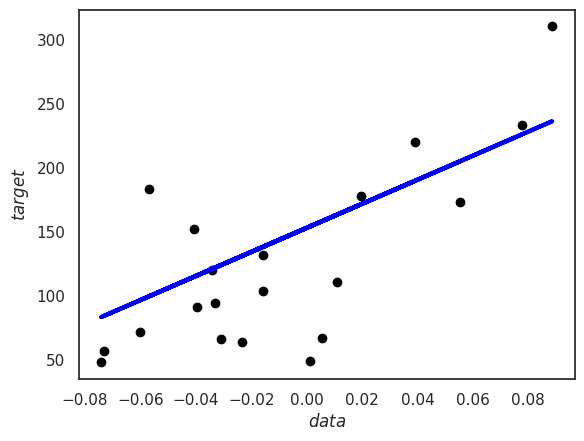

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

diabetes = datasets.load_diabetes()
# Выберем один признак
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Деление выборки на тестовую и тренировочную
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]


# Объект линейной регрессии
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)

# Предсказание
diabetes_y_pred = regr.predict(diabetes_X_test)

print('Coefficients: \n', regr.coef_)

# Метрики оценки
print("MAE: %.2f"% mean_absolute_error(diabetes_y_test,diabetes_y_pred))
print("MSE: %.2f"% mean_squared_error(diabetes_y_test,diabetes_y_pred))
print('R2: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Изобразим точки и аппроксимирующую прямую
plt.scatter(diabetes_X_test, diabetes_y_test, color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)
plt.xlabel('$data$')
plt.ylabel('$target$')
plt.show()

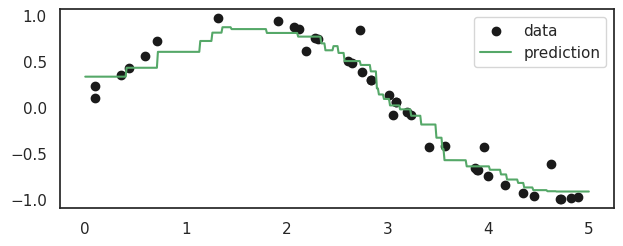

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

# Генерация данных
np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()
y[::5] += 1 * (0.5 - np.random.rand(8))

n_neighbors = 5
knn = neighbors.KNeighborsRegressor(n_neighbors)
y_ = knn.fit(X, y).predict(T)


plt.subplot(2, 1, 1)
plt.scatter(X, y, c='k', label='data')
plt.plot(T, y_, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.tight_layout()
plt.show()

## Титаник - предсказать, кто выживет на корабле

In [ ]:
df0 = pd.read_csv('Титаник.csv')
df0

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df1 = df0[['Pclass', 'Fare', 'Age', 'Sex']]

# кодируем 1 столбец
d = {'male': 1, 'female': 0}
df1_decode = df1.copy()
df1_decode['Sex'] = df1['Sex'].map(d).fillna(df1['Sex'])

# пропущенные значения
print(df1_decode.isna().sum())
df1_decode

Pclass      0
Fare        0
Age       177
Sex         0
dtype: int64


,Pclass,Fare,Age,Sex
0,3,7.2500,22.0,1
1,1,71.2833,38.0,0
2,3,7.9250,26.0,0
3,1,53.1000,35.0,0
4,3,8.0500,35.0,1
...,...,...,...,...
886,2,13.0000,27.0,1
887,1,30.0000,19.0,0
888,3,23.4500,NaN,0
889,1,30.0000,26.0,1


In [ ]:
# удаляем строки, где есть хотя бы один пропуск
df1_decode.dropna(axis=0, how='any', inplace=True)

# столбец ответов
df1_decode['Survived'] = df0['Survived']
df1_decode

,Pclass,Fare,Age,Sex,Survived
0,3,7.2500,22.0,1,0
1,1,71.2833,38.0,0,1
2,3,7.9250,26.0,0,1
3,1,53.1000,35.0,0,1
4,3,8.0500,35.0,1,0
...,...,...,...,...,...
885,3,29.1250,39.0,0,0
886,2,13.0000,27.0,1,0
887,1,30.0000,19.0,0,1
889,1,30.0000,26.0,1,1


In [ ]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X = df1_decode.loc[:, df1_decode.columns != 'Survived']
y = df1_decode.loc[:, df1_decode.columns == 'Survived']

# from sklearn.preprocessing import StandardScaler  # в задании не сказано
# scaler = StandardScaler()
# scaler.fit(X)
# X_standart = scaler.transform(X)


X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3)

clf = tree.DecisionTreeClassifier(random_state=100)
clf.fit(X_train,y_train)

# предсказание
y_new = clf.predict(X_test)
# нормированные значения важности всех признаков
importances = clf.feature_importances_
print(importances)

[0.13371598 0.27998182 0.26312238 0.32317982]


<Axes: xlabel='Features'>

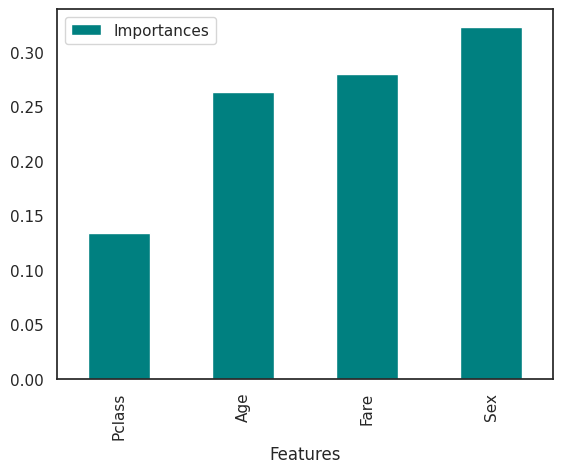

In [ ]:
final_df = pd.DataFrame({"Features" : X.columns, "Importances" : importances})
final_df.set_index('Features', inplace=True)

# Сортируем их по возрастанию для лучшей визуализации
final_df = final_df.sort_values('Importances')
final_df.plot.bar(color = 'teal')

## Вино - предсказать сорт винограда

In [ ]:
df0 = pd.read_csv('wine.csv', skiprows=0, header=None)
df0

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
# разделили данные
X = df0.loc[:, df0.columns != 0]
y = df0.loc[:, df0.columns == 0]

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score, KFold
num_folds = 10
random_state = 100
kf = KFold(n_splits=num_folds, random_state=random_state, shuffle=True)


from sklearn.neighbors import KNeighborsClassifier

accuracy = []
for i in range (1,101):
    model = KNeighborsClassifier(n_neighbors = i)
    accuracy.append(np.mean(cross_val_score(model, X, y, cv=kf, scoring='accuracy')))

In [ ]:
df_score = pd.DataFrame({'n_neighbors': range(1,101), 'accuracy': accuracy})
df_score.sort_values(by ='accuracy', inplace=True, ascending=False)
df_score

,n_neighbors,accuracy
0,1,0.769608
66,67,0.719281
62,63,0.719281
68,69,0.718954
45,46,0.713725
...,...,...
97,98,0.651634
89,90,0.651634
91,92,0.651634
95,96,0.640523


При k=1 лучшее качество по метрике accuracy

In [ ]:
from sklearn.preprocessing import StandardScaler
X_std = pd.DataFrame(StandardScaler().fit_transform(X),index=X.index,columns=X.columns)

accuracy2 = []
for i in range (1,101):
    model = KNeighborsClassifier(n_neighbors = i)
    accuracy2.append(np.mean(cross_val_score(model, X_std, y, cv=kf, scoring='accuracy')))

In [ ]:
df_score2 = pd.DataFrame({'n_neighbors': range(1,101), 'accuracy': accuracy2})
df_score2.sort_values(by ='accuracy', inplace=True, ascending=False)
df_score2

,n_neighbors,accuracy
30,31,0.983333
32,33,0.983333
31,32,0.983333
29,30,0.977778
10,11,0.977778
...,...,...
95,96,0.848039
96,97,0.836601
98,99,0.819935
99,100,0.819935


После стандартизации при k=31-33 лучшее качество по метрике accuracy

## Цены на жилье

In [ ]:
df0 = pd.read_csv('housing.csv', skiprows=0, header=None, sep='\s+')
df0

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [ ]:
from sklearn.preprocessing import StandardScaler
X = df0.loc[:, df0.columns != 13]
y = df0.loc[:, df0.columns == 13]
X_std = pd.DataFrame(data=StandardScaler().fit_transform(X), columns=X.columns)
X_std

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


In [ ]:
from sklearn import neighbors
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold

num_folds = 10
random_state = 85
kfold = KFold(n_splits=num_folds, random_state=random_state, shuffle=True)

scores = []
ii = []
# p - power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2
n_neighbors = 6
for j in range(15):
    for i in range(1,21):
        ii.append(i)
        knn = neighbors.KNeighborsRegressor(n_neighbors=6, weights='distance', p = i)
        scores.append(np.max(cross_val_score(knn, X_std, y, cv=kfold, scoring='neg_mean_squared_error')))

In [ ]:
df_score3 = pd.DataFrame({'p': ii, 'MSE': np.array(scores)*(-1)})
df_score3.sort_values(by ='MSE', inplace=True, ascending=False)
df_score3

,p,MSE
107,8,8.569218
187,8,8.569218
87,8,8.569218
67,8,8.569218
127,8,8.569218
...,...,...
41,2,6.275953
61,2,6.275953
101,2,6.275953
261,2,6.275953


Лучшее p = 8

In [ ]:
len = df0.shape[0]
round((len*0.7),0)

354.0

In [ ]:
train_X = (df0.iloc[:int(len*0.7),:]).loc[:, df0.columns != 13]
train_y = (df0.iloc[:int(len*0.7),:]).loc[:, df0.columns == 13]

test_X = (df0.iloc[int(len*0.7):int(len*0.9),:]).loc[:, df0.columns != 13]
test_y = (df0.iloc[int(len*0.7):int(len*0.9),:]).loc[:, df0.columns == 13]

In [ ]:
train_y

In [ ]:
df0.iloc[int(len*0.7):int(len*0.9),:]

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


train_X = (df0.iloc[:int(len*0.7),:]).loc[:, df0.columns != 13]
train_y = (df0.iloc[:int(len*0.7),:]).loc[:, df0.columns == 13]

test_X = (df0.iloc[int(len*0.9):,:]).loc[:, df0.columns != 13]
test_y = (df0.iloc[int(len*0.9):,:]).loc[:, df0.columns == 13]


degree = 2
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly_features.fit_transform(train_X)


model1 = LinearRegression()
model2 = KNeighborsRegressor(n_neighbors = 10)
model3 = make_pipeline(PolynomialFeatures(degree), LinearRegression())

model1.fit(train_X, train_y)
model2.fit(train_X, train_y)
model3.fit(train_X, train_y)

prediction1 = model1.predict(test_X)
prediction2 = model2.predict(test_X)
# prediction3 = model3.predict(test_X)




print("Точность первой модели:")
print('Mean Absolute Error:', mean_absolute_error(test_y, prediction1))
print('Mean Squared Error:', mean_squared_error(test_y, prediction1))

print("\nТочность второй модели:")
print('Mean Absolute Error:', mean_absolute_error(test_y, prediction2))
print('Mean Squared Error:', mean_squared_error(test_y, prediction2))

# print("\nТочность третьей модели:")
# print('Mean Absolute Error:', mean_absolute_error(test_y, prediction3))
# print('Mean Squared Error:', mean_squared_error(test_y, prediction3))

print("\nСуммарная точность:")
print('Mean Absolute Error:', np.mean([mean_absolute_error(test_y, prediction2),mean_absolute_error(test_y, prediction1), 0*mean_absolute_error(test_y, prediction3)]))
print('Mean Squared Error:', np.mean([mean_squared_error(test_y, prediction1),mean_squared_error(test_y, prediction2), 0*mean_absolute_error(test_y, prediction3)]))


print("\nСуммарная точность с весами:")
print('Mean Absolute Error:', np.mean([0.3*mean_absolute_error(test_y, prediction2),0.7*mean_absolute_error(test_y, prediction1), 0*mean_absolute_error(test_y, prediction3)]))
print('Mean Squared Error:', np.mean([0.3*mean_squared_error(test_y, prediction1),0.7*mean_squared_error(test_y, prediction2), 0*mean_absolute_error(test_y, prediction3)]))


from sklearn.preprocessing import MinMaxScaler
a1 = mean_squared_error(test_y, prediction1)
a2 = mean_squared_error(test_y, prediction2)
a3 = mean_squared_error(test_y, prediction3)

numbers = np.array([[a1, a2, a3]])
scaler = MinMaxScaler()
normalized_numbers = scaler.fit_transform(numbers.reshape(-1, 1)).reshape(-1)
# result_numbers = [1-num for num in normalized_numbers]
# print(normalized_numbers)

Точность первой модели:
Mean Absolute Error: 5.790717935844851
Mean Squared Error: 50.81426768873217

Точность второй модели:
Mean Absolute Error: 3.5972549019607847
Mean Squared Error: 20.32407058823529

Суммарная точность:
Mean Absolute Error: 3.129324279268545
Mean Squared Error: 23.71277942565582

Суммарная точность с весами:
Mean Absolute Error: 1.710893008559877
Mean Squared Error: 9.823709906128117
[3.68625114e-04 0.00000000e+00 1.00000000e+00]


# Лаб. работа №4

Рекомендательные системы

In [ ]:
"""   пока не надо, понадобится для первой части лабы
# Установка Python 2.7
!sudo apt-get update
!sudo apt-get install python2.7

# Установка pip для Python 2.7
!sudo apt-get install python-pip

# Установка ipykernel для Python 2.7
!pip2 install ipykernel
!python2 -m ipykernel install --user

# Перезапуск среды выполнения
"""

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving movies.dat to movies.dat


In [ ]:
df_rates=pd.read_csv("user_ratedmovies.dat", sep='\t')
df_movies=pd.read_csv("movies.dat", sep='\t', encoding='iso-8859-1')

df_rates.head()

,userID,movieID,rating,date_day,date_month,date_year,date_hour,date_minute,date_second
0,75,3,1.0,29,10,2006,23,17,16
1,75,32,4.5,29,10,2006,23,23,44
2,75,110,4.0,29,10,2006,23,30,8
3,75,160,2.0,29,10,2006,23,16,52
4,75,163,4.0,29,10,2006,23,29,30


In [ ]:
print("Число уникальных пользователей: ",len(df_rates.userID.unique()))
print("Общее число строк: ",df_rates.shape[0])

Число уникальных пользователей:  2113
Общее число строк:  855598


In [ ]:
from sklearn.preprocessing import LabelEncoder

# закодируем имена пользователей
enc_user=LabelEncoder()
enc_mov=LabelEncoder()

enc_user=enc_user.fit(df_rates.userID.values)
enc_mov=enc_mov.fit(df_rates.movieID.values)

# Отберём в таблице с фильмами лишь те, за которые голосовали пользователи
idx=df_movies.loc[:,'id'].isin(df_rates.movieID)
df_movies=df_movies.loc[idx]
df_rates.loc[:,'userID'] = enc_user.transform(df_rates.loc[:,'userID'].values)
df_rates.loc[:,'movieID'] = enc_mov.transform(df_rates.loc[:,'movieID'].values)
df_movies.loc[:, 'id'] = enc_mov.transform(df_movies.loc[:,'id'].values)

Матрица схожести

In [ ]:
from scipy.sparse import coo_matrix

R = coo_matrix((df_rates.rating.values, (df_rates.userID.values,df_rates.movieID.values)))
print(R.toarray().shape)

#метод SVD
from scipy.sparse.linalg import svds
u,s,vt = svds(R,k=6)

(2113, 10109)


Оценим методом ближайших соседей

In [ ]:
from sklearn.neighbors import NearestNeighbors

nn=NearestNeighbors(n_neighbors=10)
v=vt.T
nn.fit(v)
_,ind = nn.kneighbors(v, n_neighbors=10)

# матрица с ближайшими по схожести фильмами
print(ind[:10])
print('\n')

movie_titles=df_movies.sort_values('id').loc[:,'title'].values
cols=['movie']+['nn_{}'.format(i) for i in range(1,10)]
df_ind_nn=pd.DataFrame(data=movie_titles[ind],columns=cols)

# Выведем ближайшие фильмы к Терминатору
idx=df_ind_nn.movie.str.contains('Terminator 2')
print(df_ind_nn.loc[idx].head())

[[   0 4550 7871 5976 3983 6128  351  565 1149 2671]
 [   1 1337 3662 1839  501 2383  101 8920  144 5107]
 [   2  266  414    4 7875 4291 4345 6884  505 3484]
 [   3 5810 5614 4409 1459 6732 3409 3574 3147 3551]
 [   4  241  266 7875    2 6335  505 6514 5564 2899]
 [   5 3940   15  413  991 1323 1094 4670 4441 2052]
 [   6  225 3534 2272  271 3745 1150 2989 2897 6154]
 [   7  583 4751 6155 3675 1328   12 4414  160 1821]
 [   8 3942 1296 3582 5828 1440 5795 3903 5304  803]
 [   9  198  304 1797   92 3321  144  423 5027 1796]]


                          movie                  nn_1      nn_2   nn_3  \
566  Terminator 2: Judgment Day  Terminator Salvation  Die Hard  Alien   

       nn_4    nn_5          nn_6                                nn_7  \
566  Aliens  Batman  Total Recall  Indiana Jones and the Last Crusade   

                        nn_8       nn_9  
566  Mission: Impossible III  True Lies  


Найти ближайших пользователей по схожим интересам к пользователю №1

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity as cosine_similarity
D = cosine_similarity(R)  # косинусное расстояние
print(D.shape)

Принимаем рейтинги пользователей (u, v), после чего считать схожесть, как 1 - косинус между соответствующими векторами

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity as cosine_similarity
from scipy.spatial.distance import cosine
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
from sklearn.metrics import pairwise_distances

# метрика
def similarity(u, v):
    idx = (u != 0) & (v != 0)
    if np.any(idx):
        sim = -cosine(u[idx], v[idx])+1
        return sim
    else:
        return 0

d = pdist(R.toarray(), metric=similarity)  # косинусное расстояние
d.shape
D = squareform(d)
print(D.shape)
print(D)

(2113, 2113)
[[0.         0.94812721 0.         ... 0.97923888 0.95101094 0.97605984]
 [0.94812721 0.         0.         ... 0.97483184 0.94516444 0.97719862]
 [0.         0.         0.         ... 0.97192694 0.         0.        ]
 ...
 [0.97923888 0.97483184 0.97192694 ... 0.         0.95263612 0.95853347]
 [0.95101094 0.94516444 0.         ... 0.95263612 0.         0.93718396]
 [0.97605984 0.97719862 0.         ... 0.95853347 0.93718396 0.        ]]


# Лаб. работа №5

Сверточные нейронные сети для классификации

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten

## Предсказание класса одежды

### Предобработка данных

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Размерность данных

In [ ]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


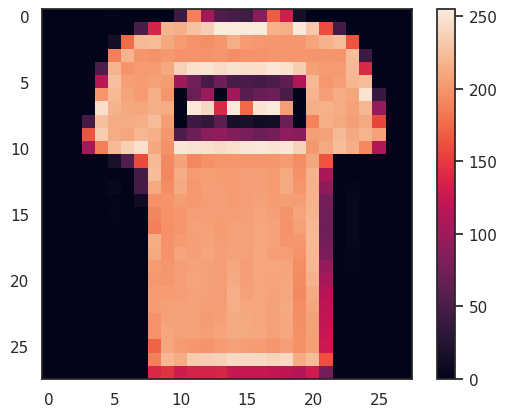

In [ ]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)

Нормировка (масштабирование)

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Вывод картинок

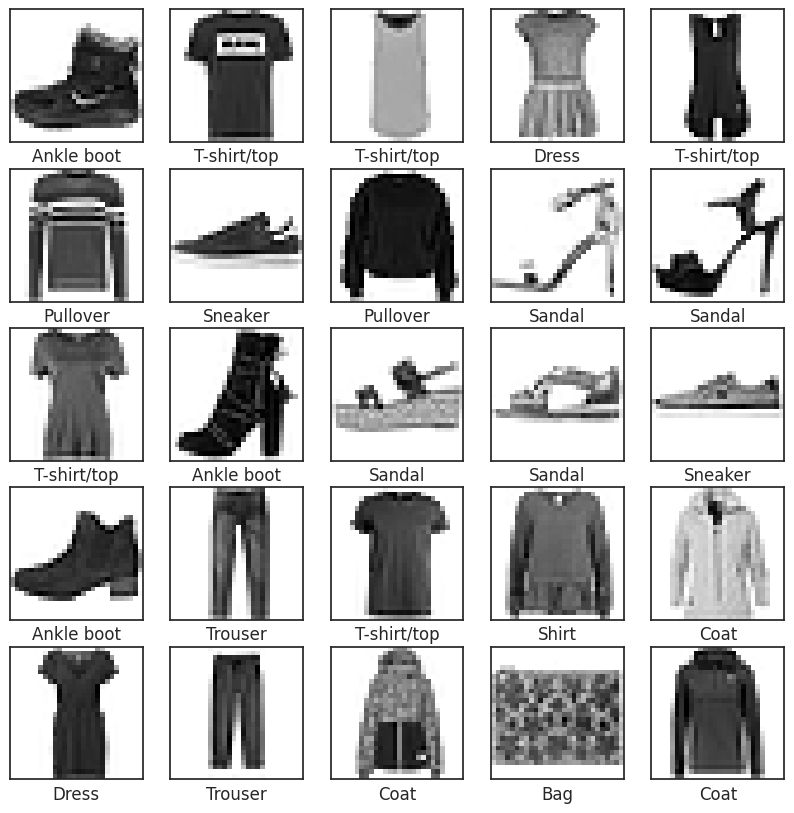

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

### Построение модели

Компиляция

In [ ]:
model = keras.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dense(128, activation=tf.nn.relu),
  keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.optimizers.Adam(),
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

Обучение

In [ ]:
model.fit(train_images, train_labels, epochs=5)

Оценка модели

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.4811 - accuracy: 0.8285
Test accuracy: 0.828499972820282


Прогноз

In [ ]:
predictions = model.predict(test_images)
# predictions = np.argmax(predictions)

313/313 [==============================] - 2s 5ms/step


Визуализация предсказаний

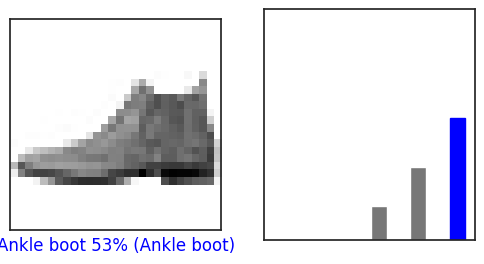

In [ ]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
    100*np.max(predictions_array),
    class_names[true_label]),
    color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

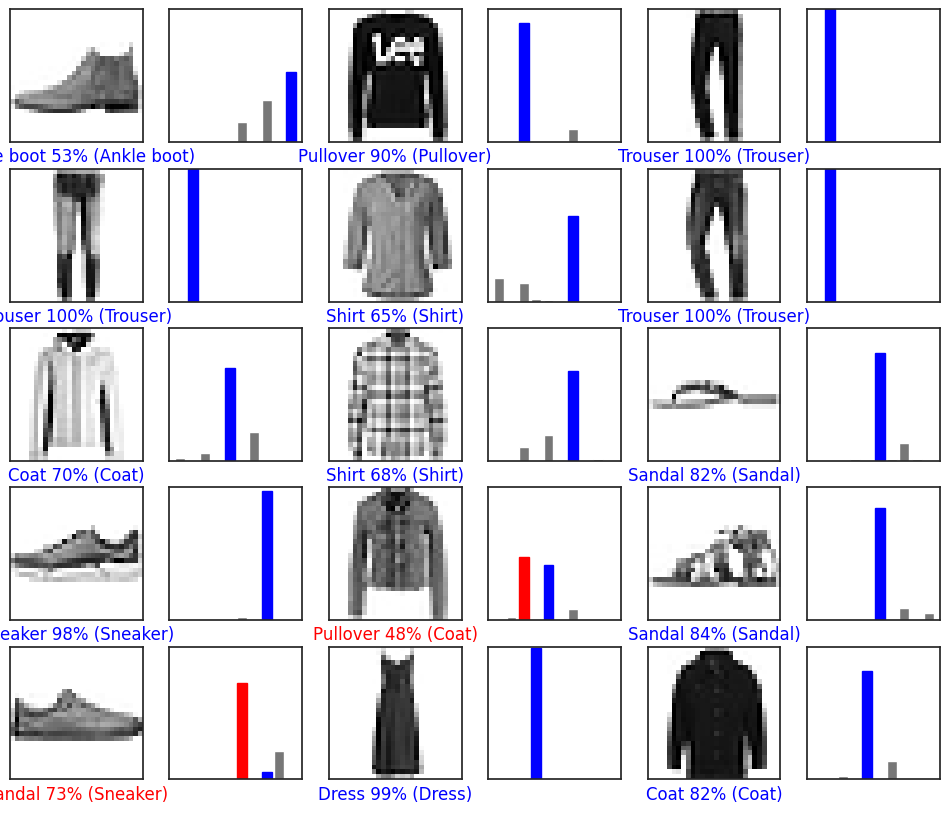

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()


### Тестирование

Прогноз

(1, 28, 28)
1/1 [==============================] - 0s 79ms/step
Ответ модели [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


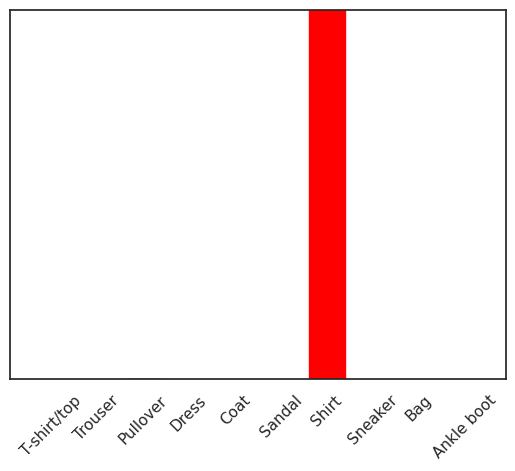

Предсказанная метка: 6 или Shirt


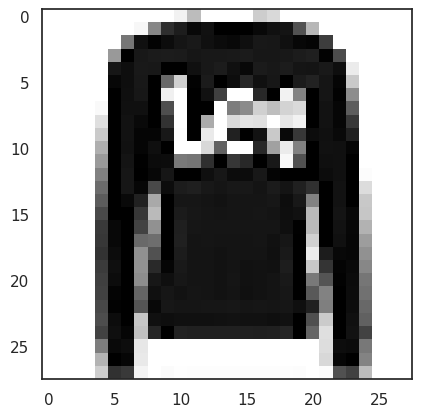

In [ ]:
img = test_images[1]
img = (np.expand_dims (img, 0))   # Добавим изображение в пакет, где оно является единственным членом
print(img.shape)

predictions_single = model.predict(img)
print("Ответ модели", predictions_single)

plot_value_array(1, predictions_single[0], test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()
plt.imshow(img[0], cmap=plt.cm.binary)

prediction_result = np.argmax(predictions_single[0])
print(f"Предсказанная метка: {prediction_result} или {class_names[prediction_result]}")

## Распознавание рукописных цифр

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0
print(f'Train dataset size: {X_train.shape}, {y_train.shape}')
print(f'Test dataset size: {X_test.shape}, {y_test.shape}')

Train dataset size: (60000, 28, 28), (60000,)
Test dataset size: (10000, 28, 28), (10000,)


Другой набор данных (картинки 8 на 8)

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.datasets import load_digits
# digits = load_digits()
# X = digits.data
# Y = digits.target
# Y = Y.astype(np.uint8)

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

# X_train = X_train.reshape((X_train.shape[0], 8, 8))
# X_test = X_test.reshape((X_test.shape[0], 8, 8))
# X_train = X_train / 255.0
# X_test = X_test / 255.0

# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)

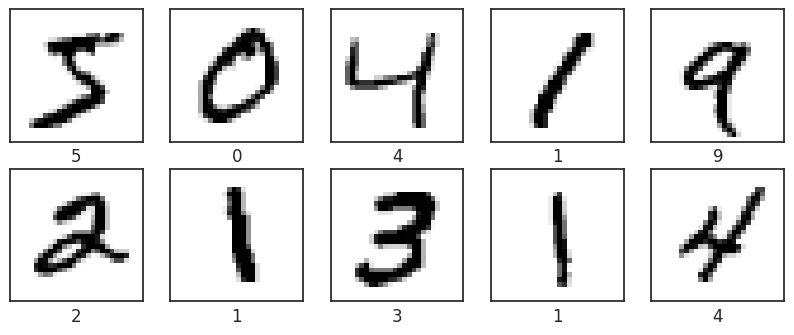

In [ ]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])

Посроение модели

In [ ]:
model = keras.Sequential([
  Flatten(input_shape=(28, 28)),
  Dense(128,activation='relu'),
  Dense(10,activation='softmax')
])

model.compile(optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

# print(model.summary())

Обучение модели

In [ ]:
H = model.fit(X_train, y_train, batch_size=100, epochs=30, validation_split=0.2)
print("Model trained")

Epoch 1/30
480/480 [==============================] - 5s 11ms/step - loss: 4.7741e-04 - accuracy: 1.0000 - val_loss: 0.0490 - val_accuracy: 0.9912
Epoch 2/30
480/480 [==============================] - 6s 13ms/step - loss: 2.7814e-04 - accuracy: 1.0000 - val_loss: 0.0493 - val_accuracy: 0.9911
Epoch 3/30
480/480 [==============================] - 3s 7ms/step - loss: 2.2247e-04 - accuracy: 1.0000 - val_loss: 0.0498 - val_accuracy: 0.9914
Epoch 4/30
480/480 [==============================] - 3s 6ms/step - loss: 1.9586e-04 - accuracy: 1.0000 - val_loss: 0.0502 - val_accuracy: 0.9911
Epoch 5/30
480/480 [==============================] - 3s 6ms/step - loss: 1.7437e-04 - accuracy: 1.0000 - val_loss: 0.0507 - val_accuracy: 0.9914
Epoch 6/30
480/480 [==============================] - 4s 8ms/step - loss: 1.6131e-04 - accuracy: 1.0000 - val_loss: 0.0506 - val_accuracy: 0.9913
Epoch 7/30
480/480 [==============================] - 3s 6ms/step - loss: 1.3895e-04 - accuracy: 1.0000 - val_loss: 0.0523

Графики ошибки и точности

<ipython-input-121-9393b7f21e7a>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'b', label='Training acc',color='red')
<ipython-input-121-9393b7f21e7a>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'b', label='Training loss',color='red')


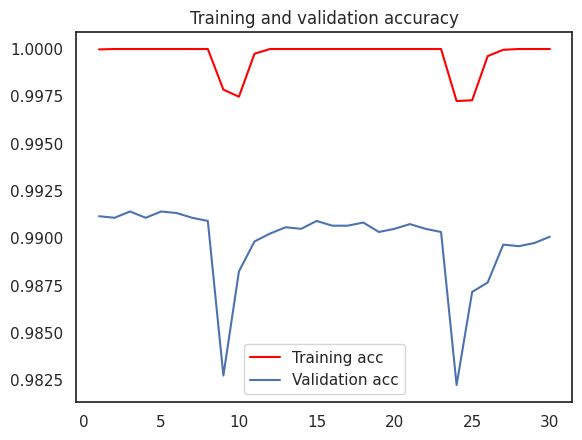

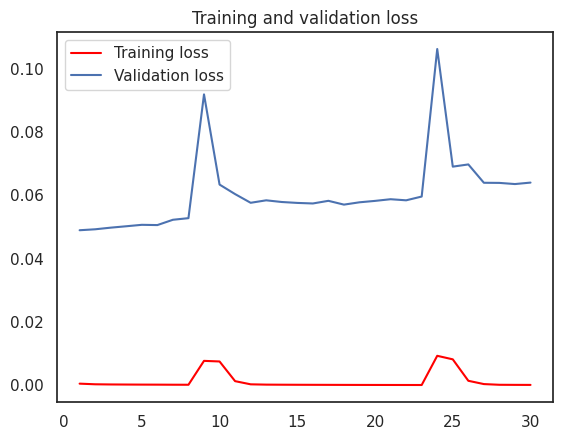

In [ ]:
acc = H.history['accuracy']
val_acc = H.history['val_accuracy']
loss = H.history['loss']
val_loss = H.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'b', label='Training acc',color='red')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss',color='red')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Предсказания

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1242 - accuracy: 0.9798
Test accuracy: 0.9797999858856201


In [ ]:
from sklearn.metrics import classification_report

predictions = model.predict(X_test, batch_size = 32)
print(classification_report(y_test, predictions.argmax(axis=1)))

313/313 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



1/1 [==============================] - 0s 39ms/step
Распознанный символ: 0


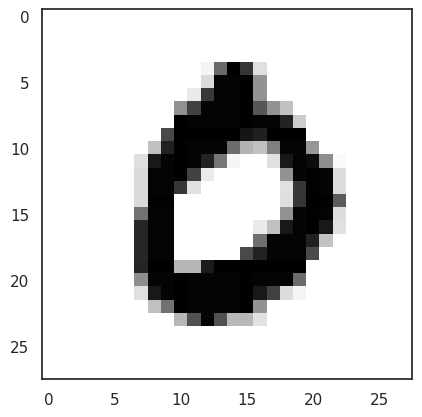

In [ ]:
n=3

plt.imshow(X_test[n], cmap=plt.cm.binary)
x = np.expand_dims(X_test[n], axis=0)
res = model.predict(x)
print(f"Распознанный символ: {np.argmax(res)}" )

# №5 ДОП

Сверточные нейронные сети для классификации

In [38]:
import torch
from torch import nn
import random
import numpy as np
import matplotlib.pyplot as plt

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)

In [29]:
import torchvision.datasets
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels


X_train = X_train.float()
X_test = X_test.float()

/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [30]:
X_train.shape, X_test.shape

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

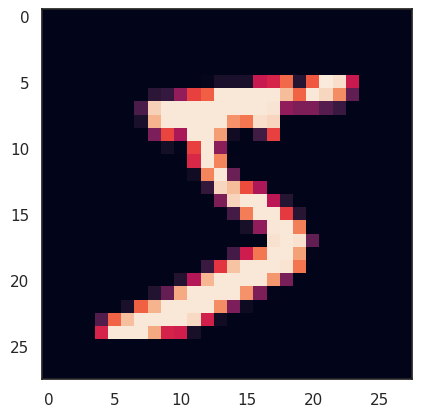

Label:  tensor(5)


In [31]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0, :, :])
plt.show()
print("Label: ",y_train[0])

In [48]:
X_train = X_train.reshape([-1, 28 * 28])
X_test = X_test.reshape([-1, 28 * 28])

In [64]:
# Определение модели
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

model = SimpleNN()

# Определение функции потерь и оптимизатора
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [56]:
class MNISTNet(torch.nn.Module):
    def __init__(self,n_hidden_neurons):
        super(MNISTNet, self).__init__()
        self.fc1 = torch.nn.Linear(28*28, n_hidden_neurons)
        self.ac1 = torch.nn.Tanh()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 10)

    def forward(self,x):
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        return x

mnist_net = MNISTNet(128)
optimizer = torch.optim.Adam(mnist_net.parameters(), lr=1.0e-3)
# torch.nn.functional.cross_entropy()

In [63]:
batch_size = 128
num_epochs = 5

# для сохрания точности и построения графика
test_accuracy_history = []
test_loss_history = []

for epoch in range(num_epochs):
    order = np.random.permutation(len(X_train))  # на каждой эпохе перемешиваем датасет

    for start_index in range(0, len(X_train), batch_size):
        # optimizer.zero_grad()

        batch_indexes = order[start_index:start_index+batch_size]

        # X_batch = X_train[batch_indexes]
        # y_batch = y_train[batch_indexes]

        # preds = mnist_net.forward(X_batch)

        # loss_value = torch.nn.functional.cross_entropy(preds, y_batch)
        # loss_value.backward()

        # optimizer.step()

        X_batch = X_train[batch_indexes]
        y_batch = y_train[batch_indexes]

        optimizer.zero_grad()
        outputs = model.forward(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

    test_preds = mnist_net.forward(X_test)
    test_loss_history.append((torch.nn.functional.cross_entropy(test_preds, y_test)).data.detach().cpu().numpy())

    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean()
    test_accuracy_history.append(accuracy.detach().cpu().numpy())   # следим за качеством
    print(accuracy)

AttributeError: ignored

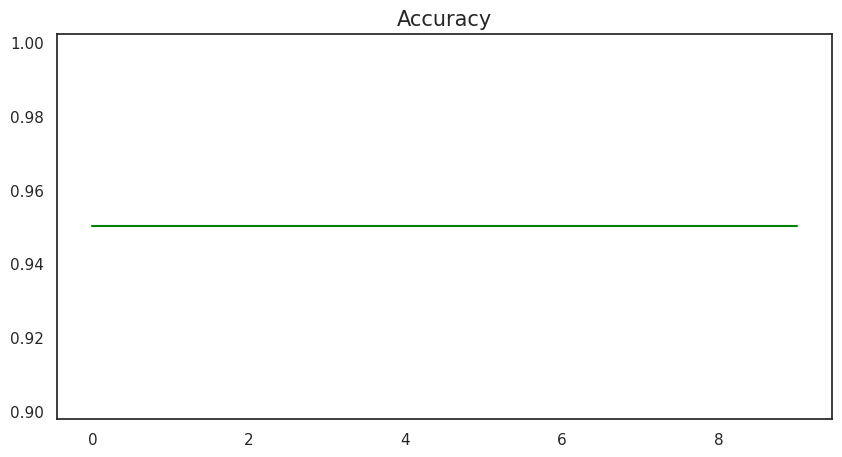

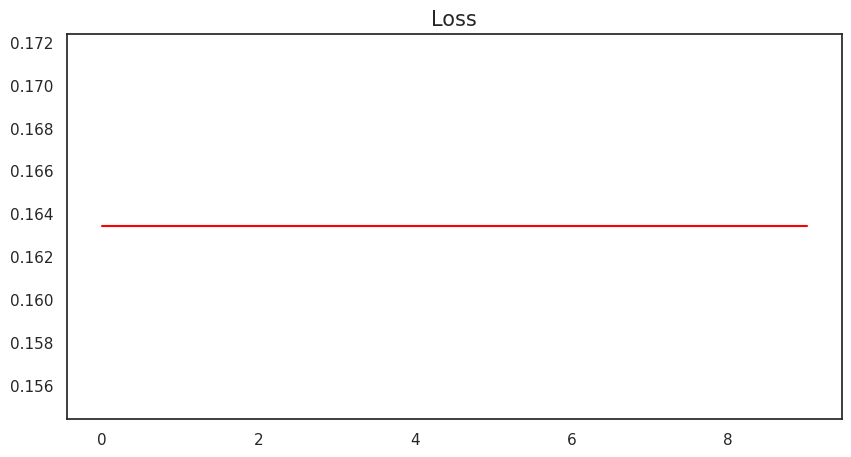

In [55]:
fig = plt.figure(figsize=(10,5))
ax_real = fig.add_subplot()
ax_real.set_title("Accuracy", fontsize=15)
ax_real.plot(test_accuracy_history, c='green')

fig = plt.figure(figsize=(10,5))
ax_real = fig.add_subplot()
ax_real.set_title("Loss", fontsize=15)
ax_real.plot(test_loss_history, c='red')

# Семинар 1

**Кластеризация методом K-means**

In [ ]:
import numpy as np
points = np.array([[2.0,3.0], [3.0,2.0], [0.0,3.0], [5.0,0.0], [0.0,1.0], [4.0,-2.0]])

etalons = np.array([points[0], points[1], points[2]])

clusters = [[], [], []]

print("Итерация номер 0\n")
print("Перерасчет эталонов:\n")
for i in range(3,len(points)):
    for j in range(3):
        d = np.linalg.norm(points[i]-etalons[j])
        if j==0:
            min_d = d
            best_etalon_ind = j
            best_etalon = etalons[j]
        else:
            if d < min_d:
                min_d = d
                best_etalon_ind = j
                best_etalon = etalons[j]

        print("Расстояние от точки {} до эталона {} (под номером {}) равно {}".format(points[i], etalons[j], j, d))


    etalons[best_etalon_ind][0] = (etalons[best_etalon_ind][0] + points[i][0])/2.0
    etalons[best_etalon_ind][1] = (etalons[best_etalon_ind][1] + points[i][1])/2.0

    print("Новый эталон под номером {} после перерасчета стал равен {}\n".format(best_etalon_ind, etalons[best_etalon_ind]))

print("Разнос точек по кластерам:\n")
for i in range(len(points)):
    for j in range(3):
        d = np.linalg.norm(points[i]-etalons[j])
        if j==0:
            min_d = d
            best_etalon_ind = j
            best_etalon = etalons[j]
        else:
            if d < min_d:
                min_d = d
                best_etalon_ind = j
                best_etalon = etalons[j]

        print("Расстояние от точки {} до эталона {} (под номером {}) равно {}".format(points[i], etalons[j], j, d))

    clusters[best_etalon_ind].append(points[i])
    print("К кластеру под номером {} добавилась точка {}\n".format(best_etalon_ind, points[i]))

for i in range(len(clusters)):
    print("К кластеру под номером {} (его координаты {}) относятся следующие точки {}".format(i, etalons[i], clusters[i]))

clusters_prev = []
k=0


while not np.array_equal(np.array(clusters), np.array(clusters_prev)):
    clusters_prev = clusters.copy()
    k += 1
    print("\nИтерация номер {}\n".format(k))
    clusters = [[], [], []]
    print("Перерасчет эталонов:\n")
    for i in range(len(points)):
        for j in range(3):
            d = np.linalg.norm(points[i]-etalons[j])
            if j==0:
                min_d = d
                best_etalon_ind = j
                best_etalon = etalons[j]
            else:
                if d < min_d:
                    min_d = d
                    best_etalon_ind = j
                    best_etalon = etalons[j]

            print("Расстояние от точки {} до эталона {} (под номером {}) равно {}".format(points[i], etalons[j], j, d))


        etalons[best_etalon_ind][0] = (etalons[best_etalon_ind][0] + points[i][0])/2.0
        etalons[best_etalon_ind][1] = (etalons[best_etalon_ind][1] + points[i][1])/2.0

        print("Новый эталон под номером {} после перерасчета стал равен {}\n".format(best_etalon_ind, etalons[best_etalon_ind]))

    print("Разнос точек по кластерам:\n")
    for i in range(len(points)):
        for j in range(3):
            d = np.linalg.norm(points[i]-etalons[j])
            if j==0:
                min_d = d
                best_etalon_ind = j
                best_etalon = etalons[j]
            else:
                if d < min_d:
                    min_d = d
                    best_etalon_ind = j
                    best_etalon = etalons[j]

            print("Расстояние от точки {} до эталона {} (под номером {}) равно {}".format(points[i], etalons[j], j, d))

        clusters[best_etalon_ind].append(points[i])
        print("К кластеру под номером {} добавилась точка {}\n".format(best_etalon_ind, points[i]))

    for i in range(len(clusters)):
        print("К кластеру под номером {} (его координаты {}) относятся следующие точки {}".format(i, etalons[i], clusters[i]))

# Семинар 2

регрессия

Уравнение регрессии: y = 1.9935064935064928*x + 2.1883116883116847
Коэффициент корреляции R = 0.9865111903120826


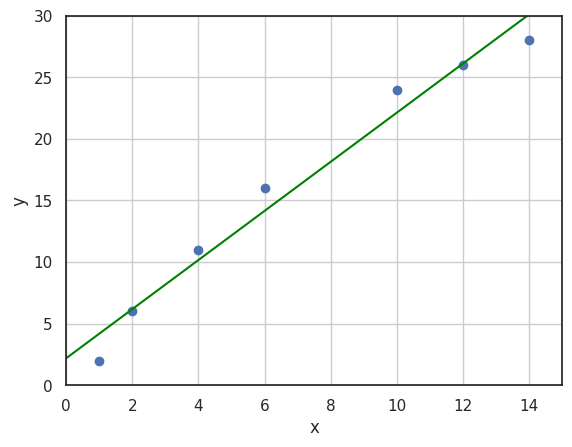

In [ ]:
A = np.array([[1, 1], [1, 2], [1, 4], [1, 6], [1, 10], [1, 12], [1, 14]])
x = np.array([1,2,4,6,10,12,14])
y = np.array([2,6,11,16,24,26,28])

coef = np.linalg.inv(A.T@A)@A.T@y
print(f"Уравнение регрессии: y = {coef[1]}*x + {coef[0]}")
print("Коэффициент корреляции R =", np.corrcoef(x, y)[0][1])


plt.plot(x, y,'o')
plt.axis([0,15,0,30])
plt.xlabel('x')
plt.ylabel('y')

plt.axline((0, coef[0]), (15, coef[1]*15 + coef[0]), color='green')
plt.grid(True)
plt.show()

In [ ]:
scipy.stats.pearsonr(x, y)

PearsonRResult(statistic=0.9865111903120827, pvalue=4.029418607911092e-05)

In [ ]:
print( (np.linalg.inv(A.T@A)@A.T@y)[::-1] )
print( np.polyfit(x, y, 1) )

[1.99350649 2.18831169]
[1.99350649 2.18831169]


Коэффициенты регрессии: a =  1.993506493506494 , b =  2.1883116883116833
Коэффициенты регрессии, проверка с помощью библиотекчного метода: [1.99350649 2.18831169]
Выборочный коэффициент корреляции:  0.9865111903120826


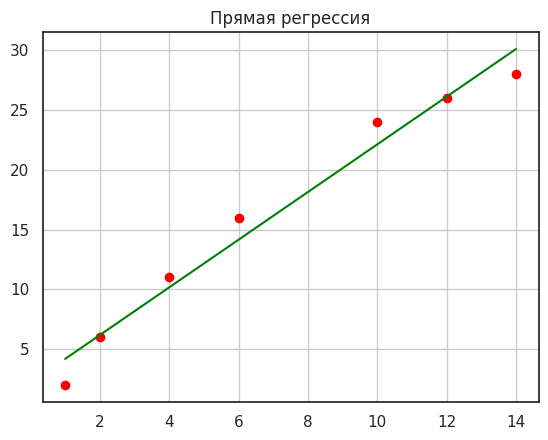

In [ ]:
def regression(x, y):
    n = len(x)
    # найти y = ax + b

    x_2 = [i**2 for i in x]
    y_2 = [i**2 for i in y]
    xy = [x[i]*y[i] for i in range(n)]

    x_sum = sum(x)
    y_sum = sum(y)
    xy_sum = sum(xy)
    x_2_sum = sum(x_2)
    y_2_sum = sum(y_2)

    A = np.array([[x_2_sum, x_sum], [x_sum, n]])
    B = np.array([xy_sum,  y_sum])
    resh = np.linalg.solve(A, B)
    a = resh[0]
    b = resh[1]
    print("Коэффициенты регрессии: a = ", a, ", b = ", b)
    print("Коэффициенты регрессии, проверка с помощью библиотекчного метода:",np.polyfit(x, y, 1))

    r_B = (n*xy_sum-x_sum*y_sum)/(np.sqrt(n*x_2_sum- x_sum**2)*np.sqrt(n*y_2_sum - y_sum**2))
    print("Выборочный коэффициент корреляции: ", r_B)

    plt.figure(1)
    plt.scatter(x, y, color='red')
    plt.plot(x, a*x+b, color='green')
    plt.title('Прямая регрессия')
    plt.grid(True)
    plt.show()


x = np.array([1., 2.,4.,6.,10.,12.,14.])
y = np.array([2.,6.,11.,16.,24.,26.,28.])
regression(x,y)